<a href="https://colab.research.google.com/github/saralapatil/utkarsh-mind-deep-learning-project-/blob/main/Pistachio_Image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
!unzip /content/pistachio.zip

Archive:  /content/pistachio.zip
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xls  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx  
  inflating: Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset_Citation_Request.txt  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.arff  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx  
  inflating: Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset_Citation_Request.txt  
  inflating: Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (1).jpg  
  inflat

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Define paths
base_path = '/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset'
kirmizi_path = os.path.join(base_path, 'Kirmizi_Pistachio')
siirt_path = os.path.join(base_path, 'Siirt_Pistachio')

# Collect image file paths
kirmizi_images = [os.path.join(kirmizi_path, f) for f in os.listdir(kirmizi_path)]
siirt_images = [os.path.join(siirt_path, f) for f in os.listdir(siirt_path)]

# Combine images and labels
images = kirmizi_images + siirt_images
labels = ['Kirmizi'] * len(kirmizi_images) + ['Siirt'] * len(siirt_images)

# Split data into train, test, and validation sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

# Output the number of images in each set
print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(val_images)} images")
print(f"Test set: {len(test_images)} images")


Training set: 1288 images
Validation set: 430 images
Test set: 430 images


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve

# Set parameters
input_shape = (128, 128, 3)  # Modify based on your image dimensions
batch_size = 32
epochs = 50

# Data generators with scaling
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Train, validation, and test data generators
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Load the best model
model.load_weights('best_model.h5')

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate True Positive, True Negative, False Positive


Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.
Found 2148 images belonging to 2 classes.
Epoch 1/50
54/54 [==============================] - ETA: 0s - loss: 0.4515 - accuracy: 0.7842
Epoch 1: val_loss improved from inf to 0.40076, saving model to best_model.keras
54/54 [==============================] - 6s 98ms/step - loss: 0.4515 - accuracy: 0.7842 - val_loss: 0.4008 - val_accuracy: 0.8205 - lr: 0.0010
Epoch 2/50
54/54 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.8389
Epoch 2: val_loss improved from 0.40076 to 0.40025, saving model to best_model.keras
54/54 [==============================] - 5s 85ms/step - loss: 0.3483 - accuracy: 0.8389 - val_loss: 0.4003 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 3/50
54/54 [==============================] - ETA: 0s - loss: 0.3254 - accuracy: 0.8534
Epoch 3: val_loss improved from 0.40025 to 0.34069, saving model to best_model.keras
54/54 [==============================] - 4s 75ms/step - 

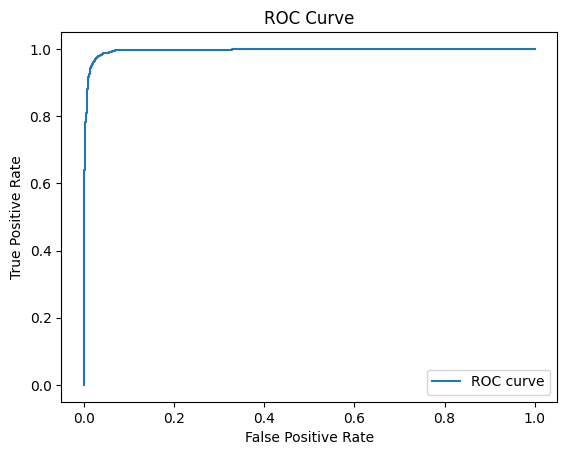

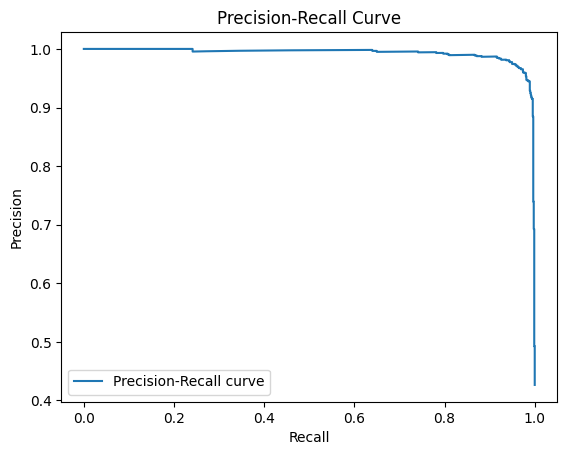

Test Accuracy: 0.9702048301696777
Precision: 0.9446764091858038
Recall: 0.9879912663755459
Confusion Matrix: 
[[1179   53]
 [  11  905]]
True Positive: 905, True Negative: 1179, False Positive: 53, False Negative: 11
Variance: 6.761127710342407
Bias: 6.761127710342407


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Set parameters
input_shape = (128, 128, 3)  # Modify based on your image dimensions
batch_size = 32
epochs = 50
base_path = '/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset'

# Data generators with scaling
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Train and validation data generators
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Test data generator
test_generator = datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Load the best model
model.load_weights('best_model.keras')

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate True Positive, True Negative, False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()

# ROC curve and Precision-Recall curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall_curve, precision_curve, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Variance and bias
train_accuracy = max(history.history['accuracy']) * 100
optimal_accuracy = max(history.history['val_accuracy']) * 100
variance = abs(train_accuracy - optimal_accuracy)
bias = abs(train_accuracy - optimal_accuracy)

# Print results
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"True Positive: {tp}, True Negative: {tn}, False Positive: {fp}, False Negative: {fn}")
print(f"Variance: {variance}")
print(f"Bias: {bias}")
